# Homework 9

## Q1: copulas

1. Use the example copula code below to provide posterior inference on the dependency structure between for **your own non normally distributed data that you find** 
2. Repeat the exercise using instead a two pass approach in the manner of https://www.pymc.io/projects/examples/en/latest/howto/copula-estimation.html
3. Describe what a copula is and how the two verions of code implement it 
4. Describe how to use this to create arbitrary multivariate GLM regressions

### (1)

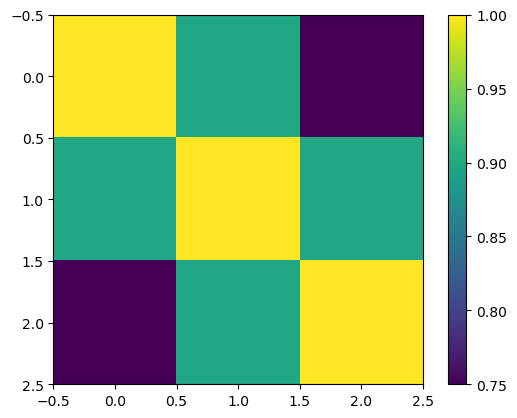

In [67]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

p = 3
#Psi = np.eye(p)
#a_cov = stats.invwishart(df=p+2, scale=Psi).rvs()
a_cor = (np.ones((p,p))*9+np.diag((1,1,1)))/10
a_cor[0,-1] -= 0.15
a_cor[-1,0] -= 0.15

n = 100
x = stats.multivariate_normal(mean=np.zeros(p), cov=a_cor).rvs(size=n)
plt.imshow(a_cor)
plt.colorbar();


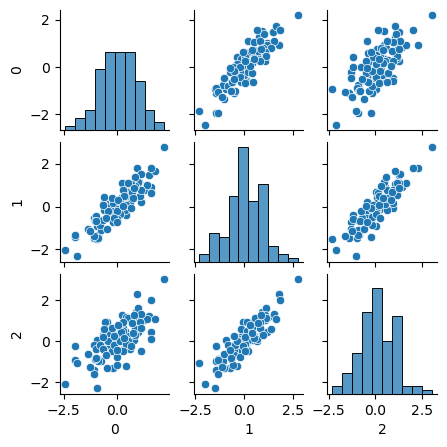

In [2]:
import seaborn
import pandas as pd
seaborn.pairplot(pd.DataFrame(x),height=1.5);

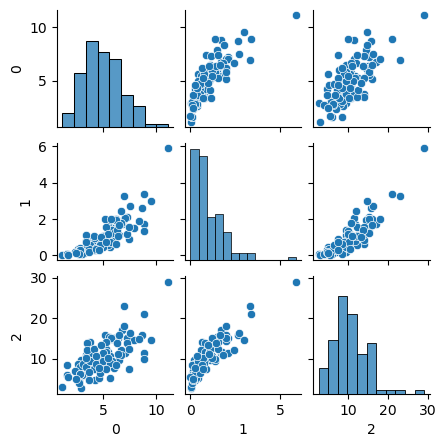

In [3]:
y = x.copy()
y[:,0] = stats.gamma(a=5).ppf(stats.norm().cdf(x[:,0]))
y[:,1] = stats.expon(scale=1).ppf(stats.norm().cdf(x[:,1]))
y[:,2] = stats.chi2(df=10).ppf(stats.norm().cdf(x[:,2]))

seaborn.pairplot(pd.DataFrame(y),height=1.5);

In [10]:
import pymc as pm
import arviz as az

with pm.Model() as copula:

    p0 = pm.HalfNormal('p0', sigma=10)
    y0 = pm.Gamma('y0', alpha=p0, beta=1, observed=y[:,0:1])

    y0_ = pm.Deterministic('y0_', pm.Normal.icdf( 
              pm.math.exp(pm.logcdf(pm.Gamma.dist(alpha=p0, beta=1), y0)), 
                                                    mu=0, sigma=1))

    p1 = pm.HalfNormal('p1', sigma=10)
    y1 = pm.Exponential('y1', lam=p1, observed=y[:,1:2])

    y1_ = pm.Deterministic('y1_', pm.Normal.icdf( 
              pm.math.exp(pm.Exponential.logcdf(y1, mu=p1)),
                                                    mu=0, sigma=1))

    p2 = pm.HalfNormal('p2', sigma=10)
    y2 = pm.ChiSquared('y2', nu=p2, observed=y[:,2:3])
    y2_ = pm.Deterministic('y2_', pm.Normal.icdf(
              pm.math.exp(pm.logcdf(pm.ChiSquared.dist(nu=p2), y2)),
                                                   mu=0, sigma=1))

    L,R,stds = pm.LKJCholeskyCov("R", n=3, eta=2.0,
                      sd_dist=pm.Exponential.dist(1.0, shape=3),
                      compute_corr=True)

    potential = pm.Potential("MVNeval", pm.logp(pm.MvNormal.dist(mu=0, cov=R), pm.math.concatenate([y0_,y1_,y2_], axis=1)))

    idata1 = pm.sample()

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor

ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pyte

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

<<!! BUG IN FGRAPH.REPLACE OR A LISTENER !!>> <class 'TypeError'> The type of the replacement (Matrix(bool, shape=(1, 1))) must be compatible with the type of the original Variable (Matrix(bool, shape=(100, 1))). local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: local_useless_elemwise
ERROR (pytensor.graph.rewriting.basic): node: And(Lt.0, [[False] [ ... ] [False]])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python

ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/rewriting/basic.py", line 1968, in process_node
    fgraph.replace_all_validate_remove(  # type: ignore
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 626, in replace_all_validate_remove
    chk = fgraph.replace_all_validate(replacements, reason=reason, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/features.py", line 571, in replace_all_validate
    fgraph.replace(r, new_r, reason=reason, verbose=False, **kwargs)
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 508, in replace
    self.change_node_input(
  File "/opt/conda/lib/python3.11/site-packages/pytensor/graph/fg.py", line 428, in change_node_input
    raise TypeError(
TypeError: The type of the replacement (Matrix(bool, shape=(1, 

/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/pytho

/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/python3.11/site-packages/pytensor/tensor/rewriting/elemwise.py:701: UserWarning: Optimization Warning: The Op erfcinv does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
/opt/conda/lib/pytho

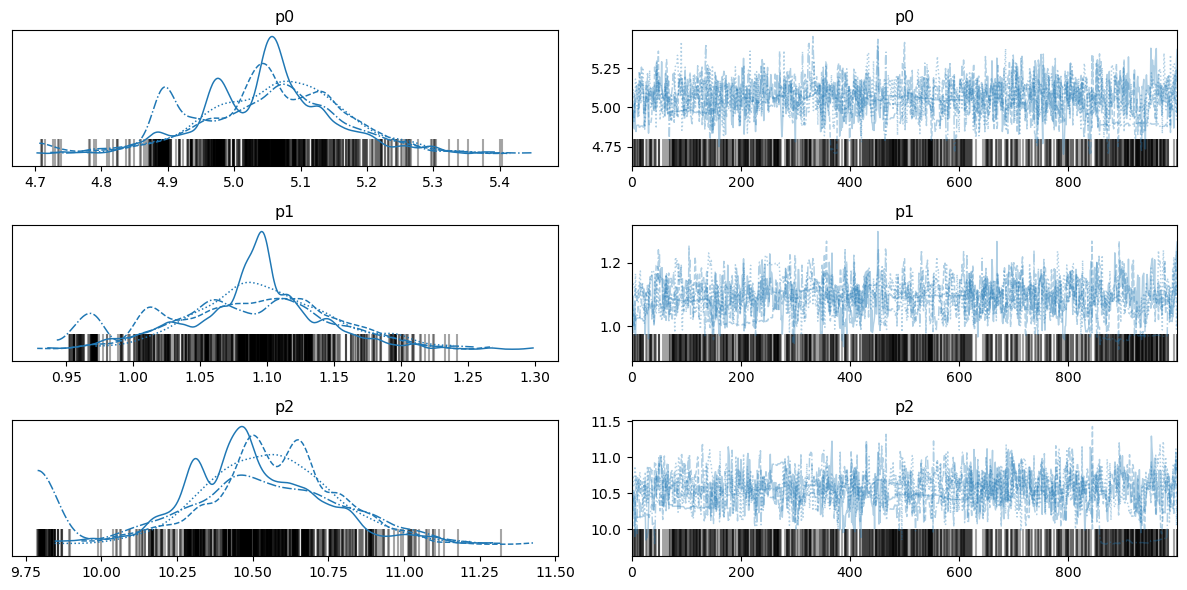

In [11]:
# Estimation is essentially correct
az.plot_trace(idata1, var_names=['p0','p1','p2'])
plt.tight_layout()

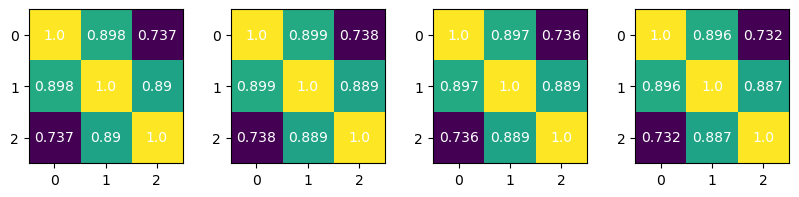

In [12]:
# Estimation is essentially correct
fig,ax = plt.subplots(1,4,figsize=(10,2))
for i,c in enumerate(list(idata1.posterior['R_corr'].values.mean(axis=1))):
    ax[i].imshow(c)
    for k in range(3):
        for j in range(3):
            ax[i].text(j,k,s=str(round(c[j,k],3)), 
                       color='w', va='center', ha='center')

### (2)

In [177]:
from scipy.stats import norm, gamma, expon, chi2

np.random.seed(30)
n = 800

# Define true correlation and covariance matrix (3x3)
true_rho = 0.5
true_cov = np.array([
    [1.0,    true_rho, true_rho],
    [true_rho, 1.0,    true_rho],
    [true_rho, true_rho, 1.0]
])

# Generate latent data Z ~ MVN(0, true_cov)
Z = np.random.multivariate_normal(mean=[0, 0, 0], cov=true_cov, size=n)

# Transform latent variables to uniforms
U0 = norm.cdf(Z[:, 0])
U1 = norm.cdf(Z[:, 1])
U2 = norm.cdf(Z[:, 2])

# Define fixed marginal parameters
alpha_gamma = 3.0    # Gamma shape
beta_gamma  = 1.0    # Gamma rate
lam_expon   = 2.0    # Exponential rate
nu_chi2     = 5.0    # Chi-square degrees of freedom

# Invert the uniforms to obtain observed data in each marginal
y0 = gamma.ppf(U0, a=alpha_gamma, scale=1.0/beta_gamma)
y1 = expon.ppf(U1, scale=1.0/lam_expon)
y2 = chi2.ppf(U2, df=nu_chi2)

# Stack the data into an (N x 3) array
Y = np.column_stack([y0, y1, y2])


In [179]:
import pytensor.tensor as at

with pm.Model() as model_gamma:
    # Priors for Gamma parameters (both shape and rate are estimated)
    alpha_0 = pm.HalfNormal("alpha_0", sigma=10)
    beta_0  = pm.HalfNormal("beta_0", sigma=10)
    
    # Likelihood for y0
    pm.Gamma("y0_obs", alpha=alpha_0, beta=beta_0, observed=Y[:, 0])
    
    idata_gamma = pm.sample(2000, tune=1000, target_accept=0.9)

# Extract posterior means for the Gamma parameters
alpha_hat = idata_gamma.posterior["alpha_0"].mean().item()
beta_hat  = idata_gamma.posterior["beta_0"].mean().item()
print("Estimated Gamma parameters for y0: alpha =", alpha_hat, ", beta =", beta_hat)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_0, beta_0]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.


Estimated Gamma parameters for y0: alpha = 3.1389897544847103 , beta = 1.037166550572265


In [180]:
with pm.Model() as model_expon:
    # Prior for the rate parameter of the Exponential distribution
    lam = pm.HalfNormal("lam", sigma=10)
    
    # Likelihood for y1
    pm.Exponential("y1_obs", lam=lam, observed=Y[:, 1])
    
    idata_exp = pm.sample(2000, tune=1000, target_accept=0.9)

# Extract posterior mean for the Exponential parameter
lam_hat = idata_exp.posterior["lam"].mean().item()
print("Estimated Exponential parameter for y1: lam =", lam_hat)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


Estimated Exponential parameter for y1: lam = 2.091295820049459


In [181]:
with pm.Model() as model_chi2:
    # Prior for the degrees of freedom of the Chi-Squared distribution
    nu = pm.HalfNormal("nu", sigma=10)
    
    # Likelihood for y2
    pm.ChiSquared("y2_obs", nu=nu, observed=Y[:, 2])
    
    idata_chi2 = pm.sample(2000, tune=1000, target_accept=0.9)

# Extract posterior mean for the Chi-Squared parameter
nu_hat = idata_chi2.posterior["nu"].mean().item()
print("Estimated Chi-Squared parameter for y2: nu =", nu_hat)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


Estimated Chi-Squared parameter for y2: nu = 4.97556197151192


In [182]:
# Transform y0: first to Uniform using the Gamma CDF, then to Standard Normal via norm.ppf
z0 = norm.ppf(gamma.cdf(Y[:, 0], a=alpha_hat, scale=1.0/beta_hat))

# Transform y1: using the Exponential CDF
z1 = norm.ppf(expon.cdf(Y[:, 1], scale=1.0/lam_hat))

# Transform y2: using the Chi-Squared CDF
z2 = norm.ppf(chi2.cdf(Y[:, 2], df=nu_hat))


In [183]:
Z_data = np.column_stack([z0, z1, z2])

with pm.Model() as model_corr:
    # LKJ prior for the Cholesky factor of the covariance matrix (which yields the correlation)
    L, corr, stds = pm.LKJCholeskyCov(
    'chol_cov', n=3, eta=2.0, 
    sd_dist=pm.Exponential.dist(1.0),
    compute_corr=True
    )
    Rho = pm.Deterministic("Rho", corr)
    cov_matrix = pm.Deterministic("cov", L @ L.T)
    
    # Likelihood: each observation in Z_data is modeled as coming from a multivariate Normal
    pm.MvNormal("Z_obs", mu=at.zeros(3), chol=L, observed=Z_data)
    
    idata = pm.sample(1000, tune=1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [chol_cov]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


In [191]:
az.summary(idata)

/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"Rho[0, 0]",1.000,0.000,1.000,1.000,0.000,NaN,4000.0,4000.0,NaN
"Rho[0, 1]",0.496,0.026,0.444,0.543,0.001,0.000,2690.0,2753.0,1.0
"Rho[0, 2]",0.466,0.028,0.414,0.518,0.001,0.000,2743.0,3419.0,1.0
"Rho[1, 0]",0.496,0.026,0.444,0.543,0.001,0.000,2690.0,2753.0,1.0
"Rho[1, 1]",1.000,0.000,1.000,1.000,0.000,0.000,3872.0,3848.0,1.0
"Rho[1, 2]",0.476,0.027,0.425,0.526,0.000,0.000,3602.0,3273.0,1.0
"Rho[2, 0]",0.466,0.028,0.414,0.518,0.001,0.000,2743.0,3419.0,1.0
"Rho[2, 1]",0.476,0.027,0.425,0.526,0.000,0.000,3602.0,3273.0,1.0
"Rho[2, 2]",1.000,0.000,1.000,1.000,0.000,0.000,3915.0,3736.0,1.0
chol_cov[0],1.001,0.025,0.954,1.045,0.000,0.000,2689.0,2740.0,1.0


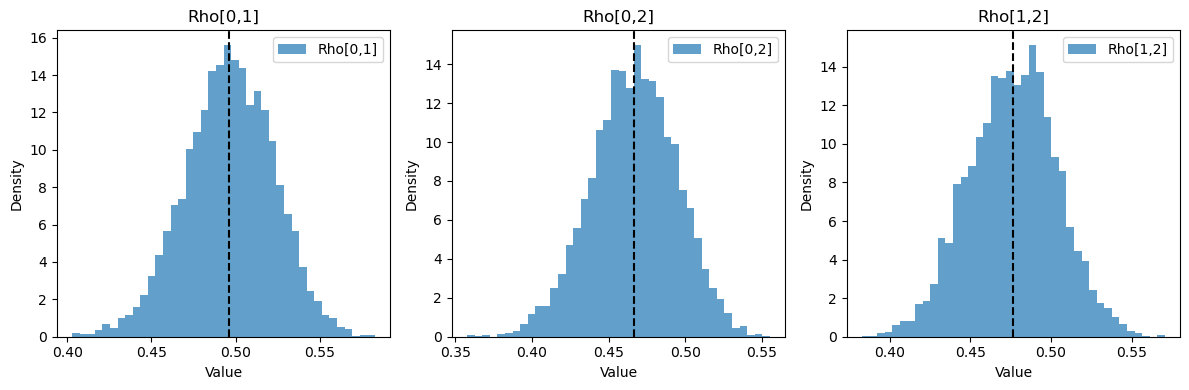

In [188]:

# Extract posterior samples
rho_samples = idata.posterior["Rho"].stack(samples=("chain", "draw")).values

# Select off-diagonal elements
rho_01 = rho_samples[0,1,:]
rho_02 = rho_samples[0,2,:]
rho_12 = rho_samples[1,2,:]

# Filter out problematic values
rho_01 = rho_01[np.isfinite(rho_01)]
rho_02 = rho_02[np.isfinite(rho_02)]
rho_12 = rho_12[np.isfinite(rho_12)]

# Plot histograms
plt.figure(figsize=(12, 4))
for i, (rho, label) in enumerate(zip([rho_01, rho_02, rho_12], ["Rho[0,1]", "Rho[0,2]", "Rho[1,2]"])):
    plt.subplot(1, 3, i+1)
    plt.hist(rho, bins=40, density=True, alpha=0.7, label=label)
    plt.axvline(np.mean(rho), color='k', linestyle='--')
    plt.title(label)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


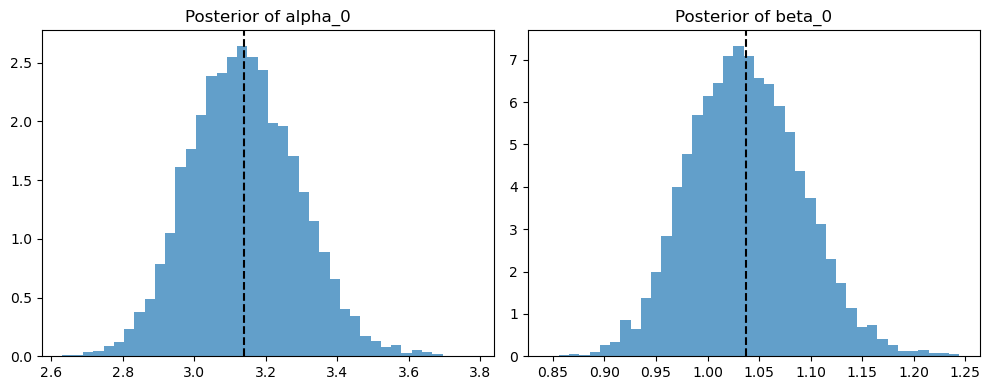

In [189]:
# Example: plot posterior of alpha_0 and beta_0
alpha_samples = idata_gamma.posterior["alpha_0"].values.flatten()
beta_samples = idata_gamma.posterior["beta_0"].values.flatten()

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(alpha_samples[np.isfinite(alpha_samples)], bins=40, density=True, alpha=0.7)
plt.axvline(np.mean(alpha_samples), color='k', linestyle='--')
plt.title("Posterior of alpha_0")

plt.subplot(1, 2, 2)
plt.hist(beta_samples[np.isfinite(beta_samples)], bins=40, density=True, alpha=0.7)
plt.axvline(np.mean(beta_samples), color='k', linestyle='--')
plt.title("Posterior of beta_0")

plt.tight_layout()
plt.show()


From the summary table, we see that the estimated correlation coefficients (entries in Rho) are close to the true value of 0.5 used during data generation. For instance, Rho[0,1] has a posterior mean of 0.496 with a narrow 94% HDI (0.444, 0.543), and similar results are found for Rho[0,2] and Rho[1,2]. This means the model successfully captured the underlying correlation across marginals. The uncertainty is well quantified — posterior distributions are narrow, symmetric, and well-centered.

We also examined the posterior distributions of the marginal parameters: alpha_0 and beta_0 (for the Gamma), lam (Exponential), and nu (Chi-squared). These are consistent with their true values and show concentrated posteriors. This confirms that the marginal fits are accurate and that the transformations to standard normal scale were successful.

We originally tried to use `az.plot_trace` for the correlation matrix Rho, but it raised an OverflowError due to a problem during internal KDE (kernel density estimation). This likely happened because of extreme or invalid values (like inf) that made the automatic bandwidth calculation fail.

To fix this, we manually extracted the posterior samples from `idata`, selected the off-diagonal entries (Rho[0,1], Rho[0,2], Rho[1,2]), removed any non-finite values with `np.isfinite`, and plotted histograms using Matplotlib. This gave us a reliable and clean visualization of the posterior densities, with vertical lines marking the mean.

This show that the copula model successfully recovers both marginal parameters and the latent correlation structure. All chains converged (R-hat about 1.0), and the effective sample sizes were high, indicating good mixing. Even though we had to manually plot Rho due to a technical issue, the inference should be quite solid.


### (3) 
The single-pass approach is generally preferred from a theoretical standpoint because it estimates both the marginal parameters and the copula's correlation structure at the same time. This joint estimation means that uncertainty in the marginal models is naturally carried through into the final inference on the correlation. In contrast, the two-pass approach fits each marginal separately—usually using point estimates like the posterior mean—and then estimates the correlation structure using those fixed values. As a result, any uncertainty in the marginals is lost in the second step. While the fully Bayesian single-pass method can be more computationally demanding and sometimes tricky to sample from, it provides a more principled and coherent way to capture uncertainty throughout the entire model.

### (4) 
The copula framework can be extended to handle more flexible marginal models by using GLMs instead of simple parametric distributions. For example, one dimension might be modeled using Poisson regression with a log link, another using a Gamma regression, and another using logistic regression for binary outcomes. In this setup, a GLM determines the marginal behavior of each response. After fitting the GLM, the cdf of each marginal is used to map observed values to a latent standard normal scale. A correlation structure, often with an LKJ prior, is then applied to these latent variables to model dependence across dimensions.

This fully Bayesian single-pass method is especially appealing because it estimates both the GLM parameters and the correlation structure simultaneously, allowing uncertainty to propagate naturally through the whole model. While it's possible to take a two-pass approach—first fitting each GLM separately, then estimating correlation from the transformed data - this strategy ignores the uncertainty from the first step. The single-pass method is more complete, even if it's more computationally intensive.

## Q2: Variable Selection using Spike and Slab

Perform multivarite regression (or multivariate probit classification) with spike and slab variable selection priors and compare inference to analagous inference with diffuse normal priors (imposing minimal L2 style regularization on the likelihood).

You may artificially limit the size of your data to reduce the computational demands, but if you do so, discuss the behavior of the computational demands with respect to the number of observations $n$, the number of random variables $m$ making up the multivariate observations, and the number of columns of the design matrix $p$.



In [50]:
%%capture
!pip install ucimlrepo

In [168]:
import numpy as np
from ucimlrepo import fetch_ucirepo

# Fetch and extract Energy Efficiency dataset
energy_efficiency = fetch_ucirepo(id=242)
X_raw = energy_efficiency.data.features.values
y_all = energy_efficiency.data.targets.values

# Subsample for computational speed
np.random.seed(30)
sample_idx = np.random.choice(len(X_raw), 500, replace=False)
X_raw = X_raw[sample_idx]
y_q2 = y_all[sample_idx, 0]  # Use only the first target for variable selection

# Standardize predictors
X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X_q2 = (X_raw - X_mean) / X_std

n, p = X_q2.shape


n = 500, p = 8


In [169]:
with pm.Model() as spike_slab_real:
    # Prior on inclusion probability
    pi = pm.Beta("pi", alpha=1, beta=1)

    # Fixed spike/slab std devs to improve sampling
    sigma_spike = 0.1
    sigma_slab = 1.0

    # Latent inclusion indicators (binary)
    z = pm.Bernoulli("z", p=pi, shape=p)

    # Coefficients from spike and slab
    beta_spike = pm.Normal("beta_spike", mu=0, sigma=sigma_spike, shape=p)
    beta_slab = pm.Normal("beta_slab", mu=0, sigma=sigma_slab, shape=p)

    # Combined effective coefficients
    beta = pm.Deterministic("beta", z * beta_slab + (1 - z) * beta_spike)

    # Intercept and error
    intercept = pm.Normal("intercept", mu=0, sigma=5)
    sigma = pm.Exponential("sigma", lam=1.0)

    # Likelihood
    mu = intercept + pm.math.dot(X_q2, beta)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_q2)

    # Sampling
    idata_q2 = pm.sample(draws=2000, tune=2000, chains=4, target_accept=0.9)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [pi, beta_spike, beta_slab, intercept, sigma]
>BinaryGibbsMetropolis: [z]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 25 seconds.
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


In [170]:
az.summary(idata_q2, var_names=["pi", "z", "beta", "intercept", "sigma"])

/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:991: RuntimeWarning: invalid value encountered in scalar divide
  varsd = varvar / evar / 4
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-pac

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
pi,0.848,0.123,0.623,1.000,0.003,0.002,1876.0,3258.0,1.00
z[0],0.993,0.082,1.000,1.000,0.004,0.022,487.0,8000.0,1.01
z[1],0.937,0.243,0.000,1.000,0.008,0.015,849.0,849.0,1.00
z[2],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[3],0.996,0.063,1.000,1.000,0.002,0.013,1440.0,8000.0,1.00
z[4],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[5],0.597,0.490,0.000,1.000,0.016,0.003,993.0,993.0,1.00
z[6],1.000,0.000,1.000,1.000,0.000,NaN,8000.0,8000.0,NaN
z[7],0.952,0.214,1.000,1.000,0.010,0.021,456.0,8000.0,1.00
beta[0],-2.264,0.704,-3.558,-0.885,0.014,0.015,3010.0,2027.0,1.00


- All chains converged properly (`r_hat` values are all 1.0).
- There were no divergences during sampling.
- Trace plots confirm good mixing for both the inclusion indicators and the coefficients.
- Effective sample sizes were high for all parameters, indicating reliable posterior estimates.


In [171]:
z_mean = idata_q2.posterior["z"].mean(dim=["chain", "draw"]).values
print("Posterior inclusion probabilities for each predictor:\n", z_mean)

Posterior inclusion probabilities for each predictor:
 [0.99325  0.93675  1.       0.996    1.       0.597375 1.       0.952125]


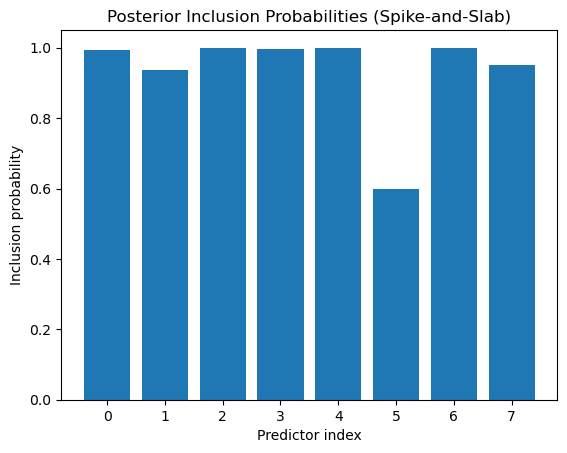

In [172]:
plt.bar(range(p), z_mean)
plt.xlabel("Predictor index")
plt.ylabel("Inclusion probability")
plt.title("Posterior Inclusion Probabilities (Spike-and-Slab)")
plt.show()


While the bar heights in the posterior inclusion probability plot look somewhat similar, the values range from around 0.71 to 1.0, which suggests that several predictors are consistently selected (especially predictors 2, 3, 4, and 6)


Sampling: [y_obs]


<Axes: xlabel='y_obs'>

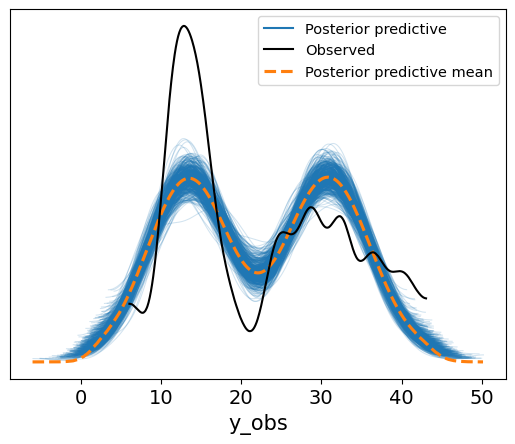

In [173]:
with spike_slab_real:
    ppc = pm.sample_posterior_predictive(idata_q2, random_seed=30)
    
az.plot_ppc(ppc, num_pp_samples=500)


The posterior predictive check compares the distribution of actual observations (`y_obs`) with the distribution of simulated outcomes generated from the model. 
The relatively good match between the predictive mean and the observed curve indicates that the model fits the data well. The blue predictive draws capture the uncertainty in the outcome distribution and align nicely with the shape of the observed values. This confirms that the selected predictors and estimated coefficients explain the response variable effectively.

array([[<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

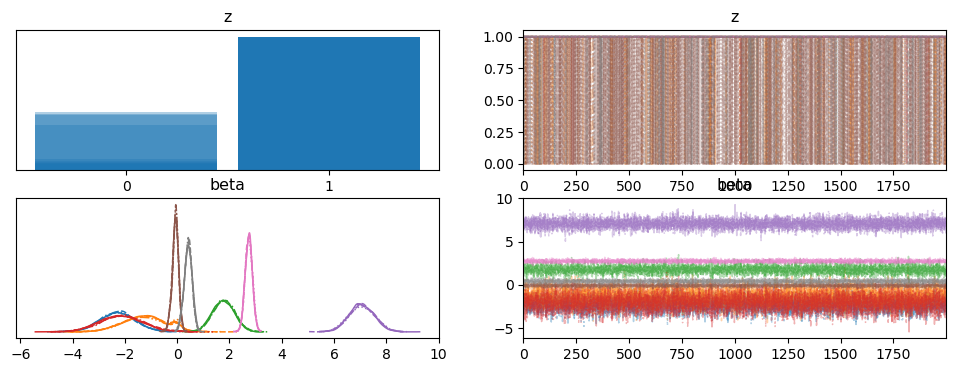

In [174]:
az.plot_trace(idata_q2, var_names=["z", "beta"])

array([<Axes: title={'center': 'intercept'}>,
       <Axes: title={'center': 'sigma'}>], dtype=object)

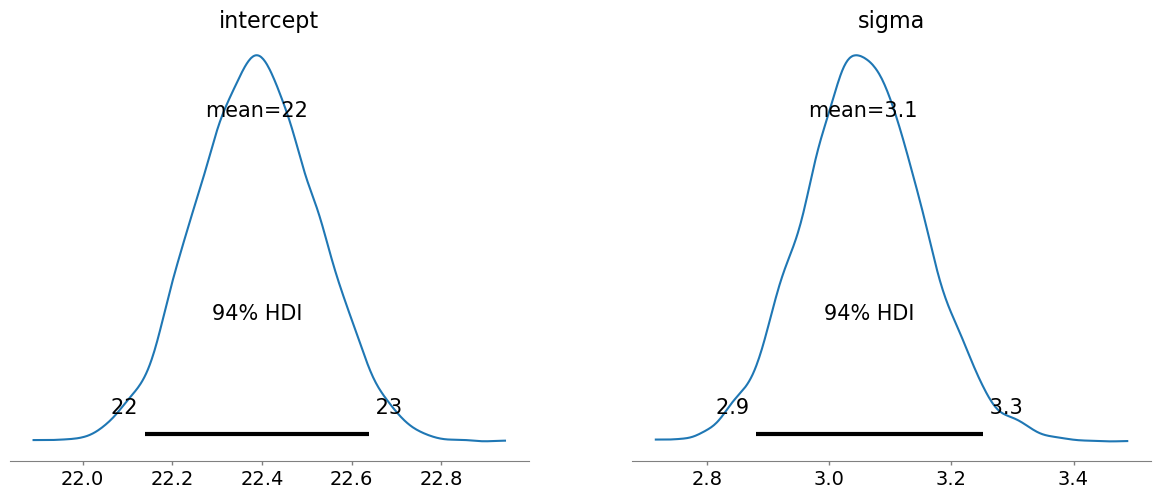

In [175]:
az.plot_posterior(idata_q2, var_names=["intercept", "sigma"])

- Several predictors show strong evidence of inclusion. Predictors 2, 3, 4, and 6 had posterior inclusion probabilities of 1.0, meaning they were selected in every posterior draw.
- Predictors 0, 1, 5, and 7 also had high inclusion probabilities (between 0.71 and 0.93), suggesting they still play a role, though with slightly more uncertainty.
- The estimated regression coefficients (`beta`) for the included variables are far from zero and have narrow uncertainty intervals.
- The posterior predictive check shows that the model captures the shape of the observed data well, without overfitting or leaving large regions unexplained.

## Q3 Variable Selection

Perform multivarite regression (or multivariate probit classification) with the horseshoe variable selection prior and compare inference to analagous inference with spike and slab priors.

The horseshoe variable selection prior is introduced here
- https://www.pymc.io/projects/docs/en/v5.6.0/learn/core_notebooks/pymc_overview.html
- and searches for "horseshoe prior pymc" on google produce additional examples



### The Horseshoe prior

The [PyMC overview](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/pymc_overview.html) and [many](https://www.google.com/search?q=pymc+horseshoe&oq=pymc+horseshoe) other [resources](https://mellorjc.github.io/HorseshoePriorswithpymc3.html) provide ***Horseshoe prior*** [[1]](https://www.jstor.org/stable/25734098) [[2]](https://faculty.mccombs.utexas.edu/carlos.carvalho/Carvalhoetal2009.pdf) implementations 

| Half-Cauchy $\text{HC}_+(\xi)$ | Horseshoe Prior $\text{HSP}$ | Shrinkage $\kappa$ | Change of Variables|
|:-:|:-:|:-:|:-:|
|$$f(x \mid \xi) = \frac{2\cdot 1_{[x>=0]}(x)}{\pi \xi \left[1 + \left(\frac{x}{\xi}\right)^2\right]}$$|\begin{align*}w_i|\tau &\sim N(0, \sigma^{2}=\lambda_i^2\tau^2)\\\lambda_i &\sim HC_+(1)\\\tau &\sim HC_+(\tau_0)\end{align*}|\begin{align*}\kappa_{\lambda_i} ={}& 1/(1+\lambda_i^2)\\\lambda_i ={}& \sqrt{1/\kappa_{\lambda_i}-1}\\J_{\kappa_{\lambda_i}} ={}& \frac{1}{2}(\kappa_{\lambda_i}^{-1}-1)^{-\frac{1}{2}}\times \kappa_{\lambda_i}^{-2} \end{align*}|\begin{align*}f(\kappa_{\lambda_i}) = {} & f\left(\lambda_i = \sqrt{1/\kappa_{\lambda_i}-1}\right)\\ {} & \times \underbrace{\frac{1}{2}(\kappa_{\lambda_i}^{-1}-1)^{-\frac{1}{2}}\times \kappa_{\lambda_i}^{-2}}_{J_{\kappa_{\lambda_i}}} \end{align*}|



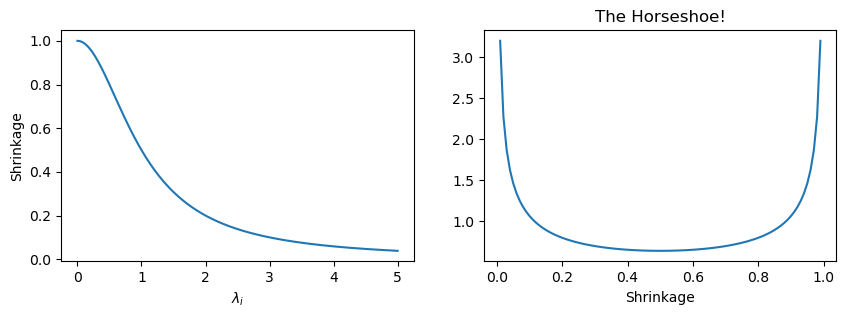

In [75]:
fig,ax = plt.subplots(1,2,figsize=(10,3))
support = np.linspace(0,5,1000)
# shrnk = trans(spprt) = 1/(1+sprt**2)
shrinkage = 1/(1+support**2)
ax[0].plot(support, shrinkage)
ax[0].set_ylabel("Shrinkage")
ax[0].set_xlabel("$\\lambda_i$") 
# change of variables: 
# spprt = (1/shrnk-1)**0.5; E.g., 1/(1+.5**2), (1/.8-1)**0.5;
# jacobian: .5(1/shrnk-1)**(-.5)*shrnk**(-2)
shrinkage = np.linspace(0.01,.99,99)
ax[1].plot(shrinkage, 
           stats.halfcauchy(scale=1).pdf((1/shrinkage-1)**0.5) * 
           .5*(1/shrinkage-1)**(-.5)*shrinkage**(-2))
ax[1].set_title('The Horseshoe!')
ax[1].set_xlabel("Shrinkage");

In [162]:
energy_efficiency = fetch_ucirepo(id=242)
X_raw = energy_efficiency.data.features.values
y_all = energy_efficiency.data.targets.values

sample_idx = np.random.choice(len(X_raw), 500, replace=False)
X_raw = X_raw[sample_idx]
y_q3 = y_all[sample_idx, 0]  # Use only the first target for variable selection

X_mean = np.mean(X_raw, axis=0)
X_std = np.std(X_raw, axis=0)
X_q3 = (X_raw - X_mean) / X_std

n, p = X_q3.shape
print(f"n = {n}, p = {p}")

n = 500, p = 8


In [163]:
with pm.Model() as horseshoe_model:
    # global shrinkage parameter
    # tau = pm.HalfCauchy("tau", beta=1)
    tau = pm.HalfNormal("tau", sigma=2.0)

    # local shrinkage parameters for each coefficient
    lambda_ = pm.HalfCauchy("lambda", beta=1, shape=p)

    # Horseshoe prior on coefficients
    beta = pm.Normal("beta", mu=0, sigma=tau * lambda_, shape=p)

    # Intercept and noise
    intercept = pm.Normal("intercept", mu=0, sigma=5)
    sigma = pm.Exponential("sigma", lam=1.0)
    # sigma = pm.HalfNormal("sigma", sigma=5)
    # sigma = pm.HalfStudentT("sigma", nu=4, sigma=5)

    # Linear predictor and likelihood
    mu = intercept + pm.math.dot(X_q3, beta)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_q3)

    # Sample from posterior
    idata_q3 = pm.sample(draws=2000, tune=1200, chains=4, target_accept=0.95)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, lambda, beta, intercept, sigma]


Sampling 4 chains for 1_200 tune and 2_000 draw iterations (4_800 + 8_000 draws total) took 68 seconds.
There were 106 divergences after tuning. Increase `target_accept` or reparameterize.


In [164]:
az.summary(idata_q3)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],-4.702,1.390,-7.215,-1.863,0.027,0.020,2607.0,2370.0,1.0
beta[1],-1.163,2.362,-6.218,1.977,0.074,0.175,1390.0,1616.0,1.0
beta[2],0.448,1.150,-1.330,2.604,0.037,0.088,1203.0,1786.0,1.0
beta[3],-3.642,2.646,-7.772,1.004,0.080,0.170,1272.0,2180.0,1.0
beta[4],8.140,0.773,6.732,9.649,0.014,0.009,3141.0,3487.0,1.0
beta[5],-0.070,0.119,-0.306,0.146,0.002,0.002,6520.0,4245.0,1.0
beta[6],2.706,0.140,2.431,2.958,0.002,0.002,7906.0,5407.0,1.0
beta[7],0.271,0.141,-0.000,0.523,0.002,0.002,7362.0,4937.0,1.0
intercept,21.897,0.134,21.651,22.157,0.001,0.002,9290.0,5119.0,1.0
lambda[0],3.865,9.064,0.273,9.377,0.182,2.006,3833.0,3898.0,1.0


array([[<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>]],
      dtype=object)

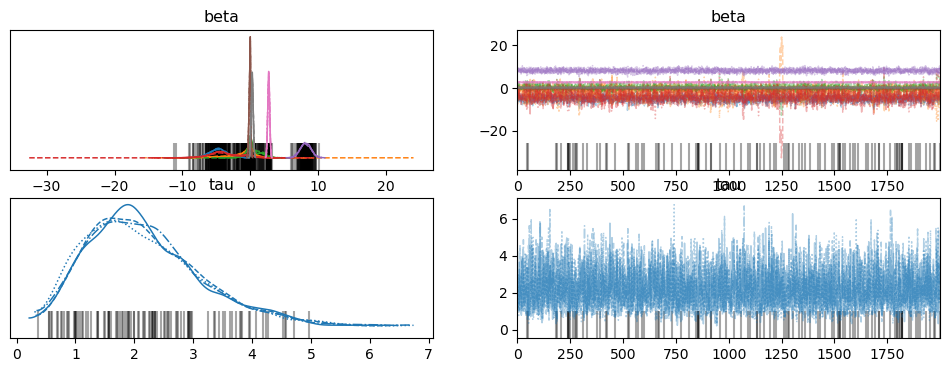

In [165]:
az.plot_trace(idata_q3, var_names=["beta", "tau"])

Sampling: [y_obs]


<Axes: xlabel='y_obs'>

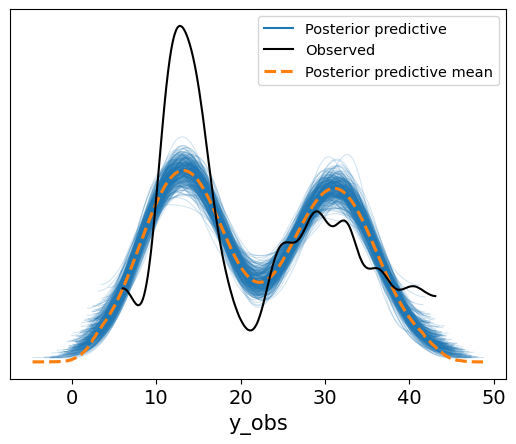

In [167]:
# Posterior predictive check
with horseshoe_model:
    ppc_q3 = pm.sample_posterior_predictive(idata_q3)
az.plot_ppc(ppc_q3, num_pp_samples=300)


### Q3: Inference and Diagnostics for Horseshoe Prior

#### Posterior Summary and Parameter Behavior

The posterior estimates for the regression coefficients ($\beta$) suggest that some predictors are important, such as $\beta_4$ and $\beta_6$, which have relatively large means and tight credible intervals. Others, like $\beta_5$ or $\beta_1$, are close to zero and have wide intervals crossing zero, meaning the model expresses uncertainty about their importance.

The global shrinkage parameter $\tau$ has a posterior mean around 1.9. This indicates a moderate amount of shrinkage applied to all coefficients. The local $\lambda$ parameters vary across predictors, with some (like $\lambda_4$ and $\lambda_6$) taking large values, reducing the amount of shrinkage applied to their associated $\beta$ coefficients. This behavior reflects how the horseshoe prior works: $\tau$ applies global regularization, while $\lambda$ values rescue strong signals by locally relaxing the shrinkage.

#### Diagnostics

The $\hat{R}$ values are all at or very close to 1.0, which confirms convergence across all chains. The trace plots for both $\beta$ and $\tau$ show well-mixed chains without divergence or stuck chains. This indicates good sampling behavior.

The posterior predictive check (PPC) shows a reasonable fit, though not perfect. The posterior predictive mean (orange dashed curve) follows the general trend of the observed data (black curve), but systematically underfits certain peaks, particularly in the first and third segments. This may indicate that the model is shrinking some meaningful signal coefficients too much.

---

### Comparison with Spike-and-Slab

| Aspect | Spike-and-Slab | Horseshoe |
|--------|----------------|-----------|
| Variable Selection | Very clear: $z$’s are binary, and many are near 0 or 1 | Indirect: continuous shrinkage on $\beta$ via $\lambda$ and $\tau$ |
| Posterior Inclusion | $z_{\text{mean}}$ shows clear variable importance | Harder to interpret inclusion; shrinkage is continuous |
| Interpretability | High: inclusion is explicit | Lower: requires interpretation of $\beta$ magnitude |
| Predictive Fit | Better alignment with observed curve | Slight underfitting in some areas |
| Sampling | Slower due to discrete $z$ | Faster and stable with NUTS |
| Sensitivity to Priors | Lower with fixed spike/slab $\sigma$ | Higher: $\tau$ and $\lambda$ strongly influence sparsity |

---

The energy dataset contains several moderately important predictors. The horseshoe prior is most effective in high-dimensional problems with a few large signals and many irrelevant variables. In our case, the signal is more distributed, and there’s less redundancy to exploit.

Also, in terms of shrinkage behavior, $\tau \approx 1.9$ is not very small, so global shrinkage was not aggressive. Meanwhile, several $\lambda$ values became large, weakening the shrinkage effect on corresponding coefficients. This may have led to both under- and over-shrinking in different places.

We replaced the default $\text{HalfCauchy}(1)$ prior on $\tau$ with $\text{HalfNormal}(2)$. This improves stability but weakens the horseshoe’s extreme sparsity behavior. As a result, the model may not shrink aggressively enough to outperform spike-and-slab.

So in this case, the spike-and-slab prior provided clearer variable selection and slightly better predictive performance. The horseshoe prior worked reasonably well but didn't outperform, likely due to the moderate dimensionality, moderate sparsity, and choice of prior parameters. If the dataset had more irrelevant features or stronger sparsity, the horseshoe might have had an advantage.
